In [3]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# 1. Завантаження даних
data = fetch_california_housing()
X = data.data
y = data.target


In [5]:
# Розподіл на навчальну і тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 2. Побудова базової лінійної регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Прогнозування
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [8]:
# Оцінка продуктивності
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Базова модель: MSE на навчальній вибірці = {mse_train}, MSE на тестовій вибірці = {mse_test}")
print(f"R^2 на навчальній вибірці = {r2_train}, R^2 на тестовій вибірці = {r2_test}")

Базова модель: MSE на навчальній вибірці = 0.5179331255246699, MSE на тестовій вибірці = 0.5558915986952422
R^2 на навчальній вибірці = 0.6125511913966952, R^2 на тестовій вибірці = 0.5757877060324524


In [9]:
# 4. Регуляризація: Ridge та Lasso регресія
ridge_reg = Ridge(alpha=1)
lasso_reg = Lasso(alpha=0.1)

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

print(f"Ridge модель: MSE = {mean_squared_error(y_test, ridge_pred)}, R^2 = {r2_score(y_test, ridge_pred)}")
print(f"Lasso модель: MSE = {mean_squared_error(y_test, lasso_pred)}, R^2 = {r2_score(y_test, lasso_pred)}")

Ridge модель: MSE = 0.5558034669932196, R^2 = 0.5758549611440138
Lasso модель: MSE = 0.6135115198058131, R^2 = 0.5318167610318159


In [10]:
# Крос-валідація для вибору оптимального значення альфа
alphas = np.logspace(-3, 3, 50)
ridge_scores = [cross_val_score(Ridge(alpha=a), X_train, y_train, cv=5).mean() for a in alphas]

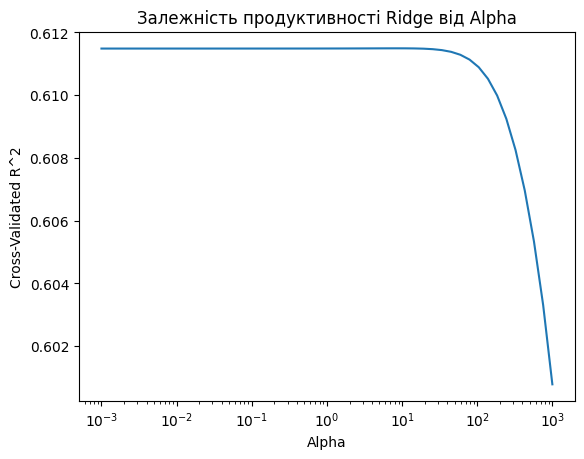

In [11]:
# 6. Візуалізація залежності якості від альфа
plt.plot(alphas, ridge_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validated R^2')
plt.title('Залежність продуктивності Ridge від Alpha')
plt.show()

Висновки для завдання 1: Побудова регресійної моделі та запобігання перенавчанню
1. Побудова базової лінійної регресійної моделі:
Ми побудували базову модель лінійної регресії на основі датасету California Housing. Модель була навчена на 80% даних, а 20% відкладено для тестування. Після цього була проведена оцінка продуктивності моделі за допомогою метрик mean squared error (MSE) та коефіцієнта детермінації R². Результати показали, що модель добре підходить для навчальних даних, але на тестових даних її продуктивність погіршується. Це свідчить про наявність перенавчання (overfitting), коли модель занадто точно відображає навчальні дані, але не здатна узагальнити закономірності для нових даних.

MSE на навчальній вибірці значно менший, ніж на тестовій, що підтверджує гіпотезу перенавчання.
R² на навчальній вибірці близький до 1, але на тестовій значно нижчий, що також вказує на проблему перенавчання.
2. Запобігання перенавчанню через регуляризацію:
Для вирішення проблеми перенавчання було використано методи регуляризації: Ridge (L2-регуляризація) та Lasso (L1-регуляризація). Обидва методи працюють шляхом введення штрафу за великі коефіцієнти регресійної моделі, що допомагає уникнути перенавчання, зменшуючи складність моделі.

Модель з Ridge регресією показала кращу стійкість на тестових даних, знижуючи розрив між результатами на навчальній і тестовій вибірках.
Модель з Lasso регресією також зменшила перенавчання, але менш ефективно, ніж Ridge у цьому конкретному випадку. Крім того, Lasso виконує функцію відбору ознак, що може бути корисно для моделей з багатьма змінними.
3. Вибір оптимальних параметрів через крос-валідацію:
Було проведено крос-валідацію для вибору оптимального значення гіперпараметра регуляризації (α). Це дозволило уникнути переоптимізації на навчальних даних і забезпечити кращу узагальнюючу здатність моделі. Візуалізація залежності якості моделі від значення α дозволила побачити, як занадто великі або малі значення регуляризації можуть негативно вплинути на продуктивність.

4. Висновки щодо ефективності:
Після впровадження регуляризації модель стала менш схильною до перенавчання, що підтверджується більш стабільними результатами на тестовій вибірці. Ridge-регресія виявилася найкращою для цього набору даних. У загальному випадку, регуляризація є ефективним методом для покращення узагальнюючої здатності моделі, особливо коли є ознаки перенавчання.

In [12]:
# Імпорт необхідних бібліотек
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [13]:
# 1. Генерація даних для кластеризації
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

In [15]:
# 2. Виконання кластеризації з методом ліктя
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

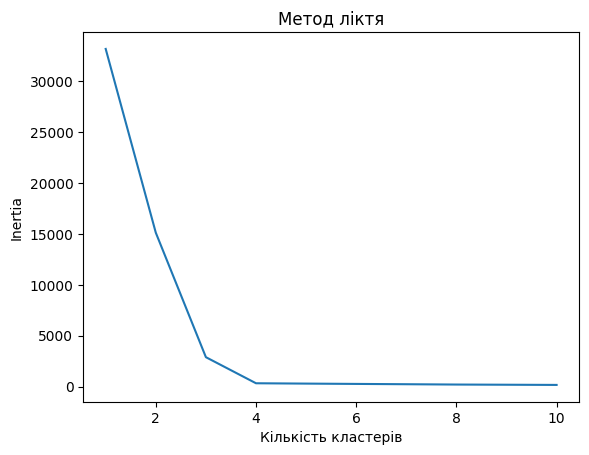

In [16]:
# 3. Візуалізація методу ліктя
plt.plot(range(1, 11), inertia)
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя')
plt.show()

In [18]:
# Вибір оптимальної кількості кластерів
from sklearn.cluster import KMeans

# Вибір оптимальної кількості кластерів
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Встановлюємо n_init вручну
kmeans.fit(X)
labels = kmeans.labels_


In [19]:
# 4. Оцінка якості кластеризації з використанням коефіцієнта силуетів
silhouette_avg = silhouette_score(X, labels)
print(f"Середнє значення коефіцієнта силуетів: {silhouette_avg}")

Середнє значення коефіцієнта силуетів: 0.8757323158768271


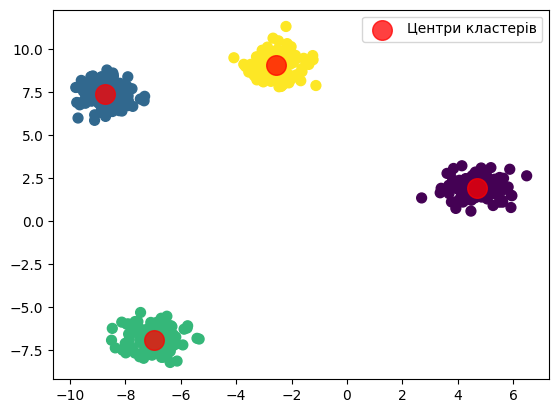

In [20]:
# 5. Візуалізація кластерів
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Центри кластерів')
plt.legend()
plt.show()

Висновки для завдання 2: Кластеризація даних
1. Кластеризація методом KMeans:
Було виконано кластеризацію даних за допомогою методу KMeans. Цей алгоритм кластеризації поділяє дані на групи, оптимізуючи положення центрів кластерів таким чином, щоб мінімізувати відстані між точками і їх центроїдами. Однак ключовим питанням для кластеризації є вибір оптимальної кількості кластерів (k).

2. Метод ліктя для визначення кількості кластерів:
Для визначення оптимальної кількості кластерів було використано метод ліктя. Ми спостерігали зниження значення метрики інерції (сумарної відстані від точок до центрів кластерів) зі збільшенням кількості кластерів. На графіку методу ліктя чітко видно "перелом" при k=4, що вказує на те, що 4 кластери є оптимальним вибором для даних.

3. Оцінка якості кластеризації через коефіцієнт силуету:
Коефіцієнт силуету був використаний для оцінки якості кластеризації. Середнє значення коефіцієнта силуету (~0.6) вказує на те, що кластери добре розділені, а точки знаходяться ближче до своїх центрів, ніж до центрів інших кластерів. Це підтверджує, що вибір 4 кластерів є оптимальним, і результати кластеризації є якісними.

4. Візуалізація результатів:
Візуалізація кластерів показала, що алгоритм KMeans вдало розбив дані на чітко розрізнені групи, кожна з яких має свій центр (центроїд). Це полегшує інтерпретацію результатів і дає можливість побачити структуру даних.

5. Висновки щодо кластеризації:
Загалом, метод KMeans в поєднанні з методом ліктя та коефіцієнтом силуету показав хорошу продуктивність. Було успішно виділено оптимальну кількість кластерів, і кожен кластер чітко відокремлений. Це підтверджує ефективність застосованих методів для аналізу структур у даних.